## **03 Exploratory Data Analysis**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

Note that we are creating two models; one will evaluate the effects of socio-economic-cultural factors that influence the climate change readiness of a developing region - in this case ASEAN - and another will evaluate the effects of the same on the climate change readiness of a developed redon - in this case the G7 Nations. Thus we first split the dataset to serve these two models, and look at how the data looks for each.

In [2]:
#Loading the Dataset
model = pd.read_csv(("https://raw.githubusercontent.com/idc0097/data103-project/main/data/climatedata.csv"), index_col=["Country","Year"])
display(model)

,,overallreadiness,socialreadiness,economicreadiness,governmentreadiness,ecosystemvulnerability,exposure,foodvulnerability,habitatvulnerability,healthvulnerability,watervulnerability,overallvulnerability,GDPPerCapita,PercGDPContributionOfAgriForestFish,publicvoiceandgovaccountabilityindex
Country,Year,,,,,,,,,,,,,,
Brunei Darussalam,1995,-0.178337,0.174853,0.522559,0.691582,0.399451,0.404785,0.434201,0.625081,0.396556,0.285724,0.108407,15933.452830,1.161528,NaN
Cambodia,1995,-0.059828,0.196209,0.313859,0.330263,0.463645,0.393905,0.637270,0.571884,0.507440,0.566929,0.065538,322.931575,47.724560,NaN
Indonesia,1995,0.015053,0.233235,0.503790,0.381178,0.475409,0.517932,0.602365,0.532567,0.482700,0.418619,0.010084,1026.393436,17.138346,NaN
Lao PDR,1995,-0.040706,0.197401,0.330295,0.378320,0.557446,0.393777,0.646768,0.551481,0.615999,0.461857,0.083271,363.880052,42.226236,NaN
Myanmar,1995,-0.069966,0.107750,0.492703,0.206757,0.559146,0.565127,0.567118,0.598676,0.675996,0.402766,0.075015,111.140814,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Germany,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46252.689300,0.735310,1.377576
Japan,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40193.252440,NaN,0.987699
Italy,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31769.965870,1.987092,1.057024


In [3]:
aseancountries = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Myanmar', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']
g7countries = ['Canada','France','Germany', 'Japan','Italy','United Kingdom','United States']

g7_eda = model.loc[g7countries]

asean_eda = model.loc[aseancountries]        

### Data Dictionary
The dataset is in a long panel dataset form from 1995 to 2020. This means that the observations of each variable across all time periods are stacked into a single column. This means that each row indicates a unique time period observation for the country in question.

Let it be known that the following column names correspond to the following variables:

1.   Country - contains the name of the country in question

2.   Year - contains the year of observation (ranging from 1995 to 2020)

3. overallreadiness - indicates the *overall climate change readiness index* of the country at a given time period. This is an index of -1 to 1, where -1 indicates least ready and 1 indicates the most ready. ***This is also the target variable.***

4. socialreadiness - indicates the *climate change readiness of society*, describing the readiness of society to accept climate change as a threat by evaluating that society's climate change education, innovation, socioeconomic ability, ICT and information infrastructure, and social inequality. -1 indicates least ready and 1 indicates most ready.

5. economicreadiness - indicates the *climate change readiness of the economy*, or the extent of investments of the private sector into becoming more sustainable. -1 indicates least ready and 1 indicates most ready.

6. governmentreadiness - indicates the *climate change readiness of the government*, or the ability of the government to act on climate change preparedness. Covers corruption, rule of law, and regulatory quality. -1 indicates least ready and 1 indicates most ready.

7. ecosystemvulnerability - indicates the *vulnerability of the ecosystem* to climate change. +1 indicates most vulnerable and -1 indicates least vulnerable.

8. exposure - this is part of the overall vulnerability index. Indicates the degree to which *a country is exposed to climate change*; for example a coastal country is more exposed than an inland one. +1 indicates most exposed and -1 the least exposed.

9. foodvulnerability - indicates the *vulnerability of the food supply and food logistics chain*; for example, a country whose route to its main food basket is susceptible to weather events and climate disaster would be more vulnerable. +1 indicates most vulnerable and -1 the least vulnerable.

10. habitatvulnerability - indicates the *vulnerability of the habitat to climate change.* +1 indicates most vulnerable and -1 the least vulnerable.

11. healthvulnerability - indicates the *vulnerability of the health sector.* For example, whether or not the health sector can cope with dengue, malaria, bird flu, cholera, and other diseases that increase in occurence along with climate change. +1 indicates most vulnerable and -1 the least vulnerable.

12. watervulnerability - indicates the *vulnerability of the water supply.* +1 indicates most vulnerable and -1 the least vulnerable. 

13. overallvulnerability - indicates the *overall vulnerability* of a country. This was calculated by the University of Notre Dame using all the other sub-indices of overall vulnerability. 

14. GDPPerCapita - indicates GDP per Capita in the value of USD in 2020.

15. PercGDPContributionOfAgriForestFish - indicates the percentage of value-added GDP contributed by the sectors of agriculture, forestry, and fishery.

16. publicvoiceandgovaccountabilityindex - an index indicating how easy it is for the public to demonstrate and participate politically, as well as the ability of the government to hold itself accountable to issues of corruption, Best public voice and accountability is 2.5, lowest is -2.5. Note it is possible to go over the threshold.






### Data Types and Missing Data
We first look at the types of data for each dataset, and existing null values.

In [4]:
g7_eda.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 182 entries, ('Canada', 1995) to ('United States', 2020)
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   overallreadiness                      175 non-null    float64
 1   socialreadiness                       175 non-null    float64
 2   economicreadiness                     175 non-null    float64
 3   governmentreadiness                   175 non-null    float64
 4   ecosystemvulnerability                175 non-null    float64
 5   exposure                              175 non-null    float64
 6   foodvulnerability                     175 non-null    float64
 7   habitatvulnerability                  175 non-null    float64
 8   healthvulnerability                   175 non-null    float64
 9   watervulnerability                    175 non-null    float64
 10  overallvulnerability                  175 non-null 

In [5]:
g7_eda.isna().sum()

overallreadiness                         7
socialreadiness                          7
economicreadiness                        7
governmentreadiness                      7
ecosystemvulnerability                   7
exposure                                 7
foodvulnerability                        7
habitatvulnerability                     7
healthvulnerability                      7
watervulnerability                       7
overallvulnerability                     7
GDPPerCapita                             0
PercGDPContributionOfAgriForestFish      8
publicvoiceandgovaccountabilityindex    28
dtype: int64

As indicated in the Data Wrangling notebook, the dataset is missing readiness and vulnerability indices for the year 2020; thus all 7 countries have one null value as our dataset covers 1995 to 2020.

The Public Voice and Accountabiliy Index has no data for four years (1995, 1997, 1999, and 2001), leading to 7 countries * 4 years = 28 missing values in that variable.

Let us identify the rows and years which have missing data for PercGDPContributionOfAgriForestFish for the G7:

In [6]:
g7agrinan = g7_eda[g7_eda['PercGDPContributionOfAgriForestFish'].isna()]
g7agrinan = g7agrinan [['PercGDPContributionOfAgriForestFish']]
g7agrinan

PercGDPContributionOfAgriForestFish
Country       Year                                     
Canada        1995                                  NaN
              1996                                  NaN
              2019                                  NaN
              2020                                  NaN
Japan         2020                                  NaN
United States 1995                                  NaN
              1996                                  NaN
              2020                                  NaN

In [7]:
asean_eda.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 260 entries, ('Brunei Darussalam', 1995) to ('Viet Nam', 2020)
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   overallreadiness                      250 non-null    float64
 1   socialreadiness                       250 non-null    float64
 2   economicreadiness                     250 non-null    float64
 3   governmentreadiness                   250 non-null    float64
 4   ecosystemvulnerability                250 non-null    float64
 5   exposure                              250 non-null    float64
 6   foodvulnerability                     250 non-null    float64
 7   habitatvulnerability                  250 non-null    float64
 8   healthvulnerability                   250 non-null    float64
 9   watervulnerability                    250 non-null    float64
 10  overallvulnerability                  250 non

In [8]:
asean_eda.isna().sum()

overallreadiness                        10
socialreadiness                         10
economicreadiness                       10
governmentreadiness                     10
ecosystemvulnerability                  10
exposure                                10
foodvulnerability                       10
habitatvulnerability                    10
healthvulnerability                     10
watervulnerability                      10
overallvulnerability                    10
GDPPerCapita                             0
PercGDPContributionOfAgriForestFish      6
publicvoiceandgovaccountabilityindex    40
dtype: int64

As indicated in the Data Wrangling notebook, the dataset is missing readiness and vulnerability indices for the year 2020; thus all 10 countries have one null value as our dataset covers 1995 to 2020.

The Public Voice and Accountabiliy Index has no data for four years (1995, 1997, 1999, and 2001), leading to 10 countries * 4 years = 40 missing values in that variable.

Let us identify the rows for the ASEAN dataset that contains missing data for % of GDP contribution by the Agricultural, Forestry, and Fishery Sectors:

In [9]:
aseanagrinan = asean_eda[asean_eda['PercGDPContributionOfAgriForestFish'].isna()]
aseanagrinan = aseanagrinan [['PercGDPContributionOfAgriForestFish']]
aseanagrinan

PercGDPContributionOfAgriForestFish
Country Year                                     
Myanmar 1995                                  NaN
        1996                                  NaN
        1997                                  NaN
        1998                                  NaN
        1999                                  NaN
        2000                                  NaN

*Missing data will be addressed in 04 Data Imputation.*

### Summary Statistics

In [10]:
g7_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
overallreadiness,175.0,0.130610,0.063918,-0.029855,0.112185,0.142878,0.166692,0.282399
socialreadiness,175.0,0.601701,0.077726,0.386917,0.556309,0.610533,0.655873,0.745039
economicreadiness,175.0,0.557043,0.127577,0.359081,0.475101,0.522559,0.627962,0.897492
governmentreadiness,175.0,0.758769,0.069475,0.571557,0.730979,0.772875,0.812737,0.852719
ecosystemvulnerability,175.0,0.356647,0.071614,0.276882,0.286511,0.342915,0.426350,0.476143
exposure,175.0,0.429790,0.054123,0.346770,0.389994,0.433494,0.481034,0.519501
foodvulnerability,175.0,0.267497,0.053996,0.190732,0.219277,0.243601,0.313696,0.357600
habitatvulnerability,175.0,0.428850,0.049534,0.362966,0.391697,0.403350,0.472515,0.526631
healthvulnerability,175.0,0.163511,0.053738,0.111622,0.122628,0.141045,0.172100,0.291677
watervulnerability,175.0,0.319936,0.059792,0.203242,0.290013,0.314478,0.378328,0.402039


In [11]:
asean_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
overallreadiness,250.0,-0.027506,0.078698,-0.279442,-0.067003,-0.014156,0.021177,0.138054
socialreadiness,250.0,0.275451,0.127025,0.107750,0.206739,0.250032,0.290211,0.748648
economicreadiness,250.0,0.453321,0.163161,0.172036,0.317040,0.430365,0.522559,0.877555
governmentreadiness,250.0,0.471751,0.178709,0.169742,0.350090,0.429202,0.580781,0.892001
ecosystemvulnerability,250.0,0.463804,0.075522,0.332371,0.401717,0.465641,0.554342,0.561250
exposure,250.0,0.469750,0.058155,0.393777,0.404785,0.474181,0.517932,0.565127
foodvulnerability,250.0,0.498148,0.097570,0.263391,0.441730,0.519037,0.564576,0.660131
habitatvulnerability,250.0,0.507361,0.068083,0.350582,0.457278,0.524740,0.546814,0.625081
healthvulnerability,250.0,0.444407,0.144349,0.188237,0.348816,0.419900,0.538553,0.748686
watervulnerability,250.0,0.436561,0.090114,0.277320,0.393076,0.440837,0.503905,0.566930


We can make the following observations:
1.   Since 1 indicates most ready and -1 least ready, the G7 have a higher average *overall readiness index* at a score of 0.1306, whereas ASEAN has an average index of -0.0275. The G7 also has higher sub-sector readiness index scores than ASEAN. 

2.   Since 1 indicates most vulnerable and -1 least vulnerable, the G7 is notably has a lower average *overall vulnerability index* than ASEAN. The G7 has an overall vulnerability index mean of -0.0599 and ASEAN a mean of 0.0375. The G7 also has lower sub-sector vulnerability indices than ASEAN.

3. The G7 has a higher average GDP per Capita at USD 37,649.76. ASEAN has an average GDP per capita of USD 8799.96. 

4. ASEAN has a higher mean for the % of GDP contributed by the Agriculture, Forestry, and Fishery sector at 15.9367%. The G7 only has a mean of 1.3982%.

5. Since 2.5 indicates the best public voice and accountability index and -2.5 the least, the G7 has a better *public voice and accountability index* with a score of 1.2256 than ASEAN whose score is at -0.7416.



### Data Distribution Plots
It is important to look at how data is distributed such that we can understand the limitations of our model in making predictions. For example, if our G7 dataset primarily has very high GDP per capita, it is a sign to us that the model is likely only to work in similar datasets, and that it is better to look at our ASEAN model to understand how a lower GDP per capita interacts with the target variable. 

In [12]:
#Generation of dataframes for plotting distribution
distrib = model.copy(deep=True)
distrib["Category"] = np.nan
distrib["Category"].loc[g7countries] = "G7"
distrib["Category"].loc[aseancountries] = "ASEAN"

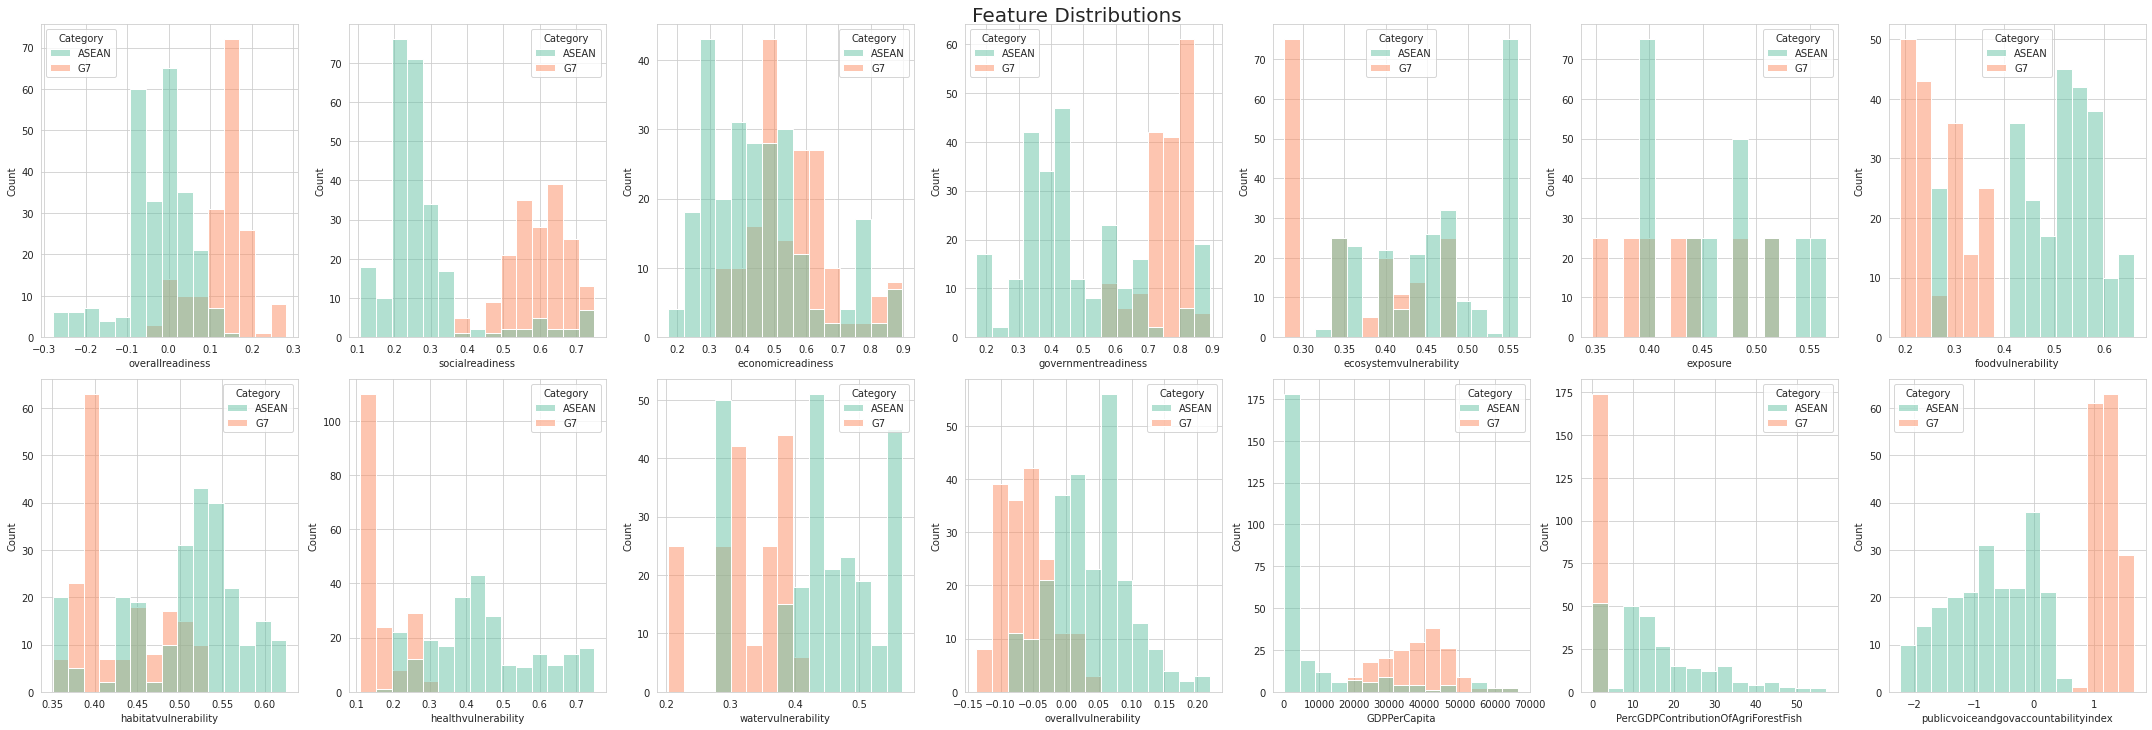

In [13]:
#Distribution of all features
def plot_distribs(data, features, hue, labels):
    fig, ax = plt.subplots(2,7, figsize=(30,10))
    ax = ax.ravel()
    for i in range(14):
        sns.histplot(data=data, x=features[i], hue=hue, 
                    ax=ax[i], palette="Set2", kde=False, 
                    bins=15)
        ax[i].set_xlabel(labels[i])
    fig.suptitle("Feature Distributions", fontsize=20, y=1.01)
    plt.tight_layout()
    plt.show()
   
features = ["overallreadiness", "socialreadiness", "economicreadiness", "governmentreadiness", "ecosystemvulnerability", "exposure", "foodvulnerability", "habitatvulnerability", "healthvulnerability", "watervulnerability" , "overallvulnerability" , "GDPPerCapita", "PercGDPContributionOfAgriForestFish" ,"publicvoiceandgovaccountabilityindex"]

plot_distribs(distrib, model.columns, "Category", features)      

We can make the following observations:
1. When it comes to the features of climate change readiness, it is clear that the G7 has an advantage over ASEAN. For overall readiness, social readiness, economic readiness, and government readiness, the G7 is distributed to be on the right-hand side of the graphs with the positive values while ASEAN is distributed to be on the left side where the values are closer to 0 or are negative. This means that the G7, generally, is more ready for climate change than ASEAN.
2. The reverse is true for climate change vulnerability. The G7 is on the left-hand side of the graphs for all vulnerability-related features, while ASEAN is one the right-hand side of the graphs, indicating that ASEAN is more vulnerable than the G7. The only exception to this is Habitat Vulnerability and exposure, where there is less of a clear-cut distinction in their distributions, indicating that some areas of ASEAN and the G7 have very similar vulnerability measures in these areas.
3. ASEAN has a much lower distribution when it comes to GDP per Capita, with most of the data from ASEAN being concentrated on the left-hand side of the graph; this comes as no surprise given that ASEAN is a developing region. The G7's distribution of GDP per capita is concentrated on the middle of the graph. Thus, ASEAN has a generally lower GDP per Capita than the G7. It is worth noting that ASEAN has some data distribution indicating that it has exceeded the G7 in GDP per Capita. This is likely from the "economic booms" years felt by the more developed ASEAN countries, Singapore and Brunei.
4. Politically, the G7 performs better than ASEAN. The G7's "Public Voice and Accountability Index" - which is an index indicating how easy it is for the public to demonstrate and participate politically, as well as the ability of the government to hold itself accountable to issues of corruption - is quite high, distributed on the right-hand side of the graph. ASEAN is distributed mostly on the left-hand side of the graph, even approaching -2.5 which is the lowest possible value for this index.

### Correlation
We investigate the correlation of our feature variables to each other, particularly the correlation of the features with our target variable **overallreadiness.**

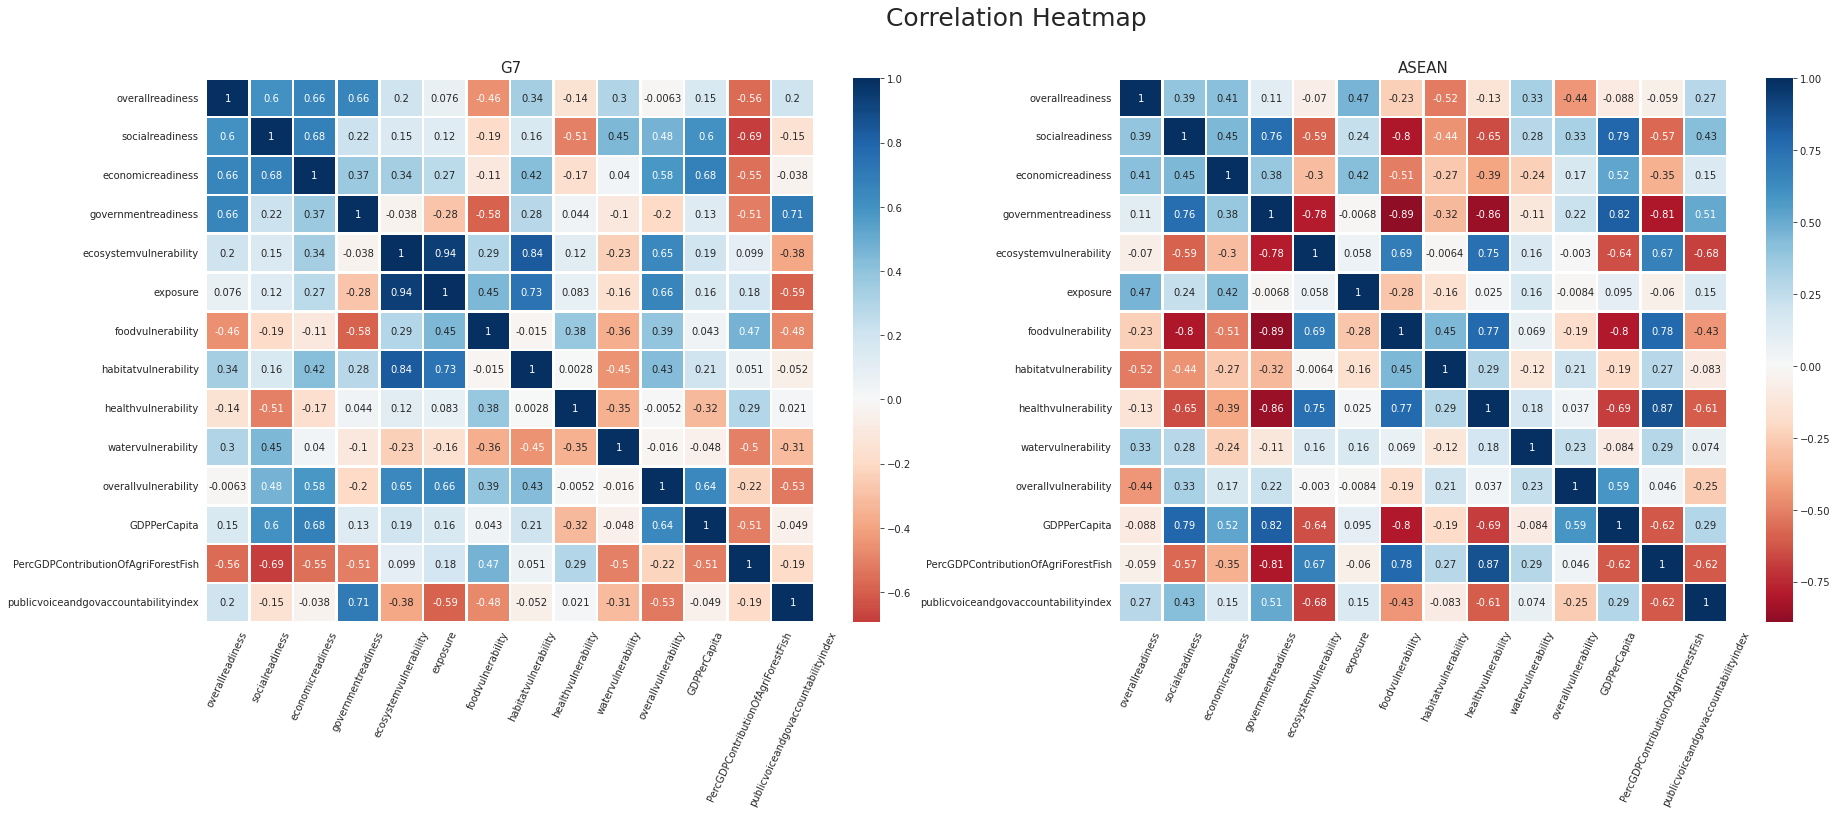

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

sns.heatmap(g7_eda.corr(), annot=True, center=0, 
            linewidths=1.5, cmap="RdBu", ax=ax1)
sns.heatmap(asean_eda.corr(), annot=True, center=0, 
            linewidths=1.5, cmap="RdBu", ax=ax2)

ax1.tick_params(axis="x", rotation=65)
ax2.tick_params(axis="x", rotation=65)
ax1.set_title("G7", fontsize=15)
ax2.set_title("ASEAN", fontsize=15)

fig.suptitle("Correlation Heatmap", fontsize=25)

plt.show()

In [15]:
# Create correlation matrix for G7
g7_corr_mat = g7_eda.corr()
  
# Retain upper triangular values of correlation matrix and make Lower triangular values Null
g7_upper_corr_mat = g7_corr_mat.where(
    np.triu(np.ones(g7_corr_mat.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
g7_unique_corr_pairs = g7_upper_corr_mat.unstack().dropna()

pd.set_option('display.max_rows', None)
  
# Sort correlation pairs
g7_sorted_mat = g7_unique_corr_pairs.sort_values()
g7_df_corr = pd.DataFrame(g7_sorted_mat, columns=['correlation'])
g7_df_corr

correlation
PercGDPContributionOfAgriForestFish  socialreadiness                        -0.693069
publicvoiceandgovaccountabilityindex exposure                               -0.590854
foodvulnerability                    governmentreadiness                    -0.583814
PercGDPContributionOfAgriForestFish  overallreadiness                       -0.561071
                                     economicreadiness                      -0.552043
publicvoiceandgovaccountabilityindex overallvulnerability                   -0.525786
PercGDPContributionOfAgriForestFish  governmentreadiness                    -0.512726
                                     GDPPerCapita                           -0.511062
healthvulnerability                  socialreadiness                        -0.506234
PercGDPContributionOfAgriForestFish  watervulnerability                     -0.500979
publicvoiceandgovaccountabilityindex foodvulnerability                      -0.475123
foodvulnerability                    overallreadiness                       -0.456205
watervulnerability                   habitatvulnerability                   -0.448016
publicvoiceandgovaccountabilityindex ecosystemvulnerability                 -0.382688
watervulnerability                   foodvulnerability                      -0.356153
                                     healthvulnerability                    -0.349719
GDPPerCapita                         healthvulnerability                    -0.320748
publicvoiceandgovaccountabilityindex watervulnerability                     -0.313200
exposure                             governmentreadiness                    -0.282170
watervulnerability                   ecosystemvulnerability                 -0.230477
PercGDPContributionOfAgriForestFish  overallvulnerability                   -0.218863
overallvulnerability                 governmentreadiness                    -0.202444
publicvoiceandgovaccountabilityindex PercGDPContributionOfAgriForestFish    -0.192183
foodvulnerability                    socialreadiness                        -0.190012
healthvulnerability                  economicreadiness                      -0.170217
watervulnerability                   exposure                               -0.162595
publicvoiceandgovaccountabilityindex socialreadiness                        -0.152722
healthvulnerability                  overallreadiness                       -0.138632
foodvulnerability                    economicreadiness                      -0.110506
watervulnerability                   governmentreadiness                    -0.100136
publicvoiceandgovaccountabilityindex habitatvulnerability                   -0.052469
                                     GDPPerCapita                           -0.048928
GDPPerCapita                         watervulnerability                     -0.047951
ecosystemvulnerability               governmentreadiness                    -0.038168
publicvoiceandgovaccountabilityindex economicreadiness                      -0.037573
overallvulnerability                 watervulnerability                     -0.016042
habitatvulnerability                 foodvulnerability                      -0.014556
overallvulnerability                 overallreadiness                       -0.006280
                                     healthvulnerability                    -0.005214
healthvulnerability                  habitatvulnerability                    0.002772
publicvoiceandgovaccountabilityindex healthvulnerability                     0.021102
watervulnerability                   economicreadiness                       0.040415
GDPPerCapita                         foodvulnerability                       0.043425
healthvulnerability                  governmentreadiness                     0.043970
PercGDPContributionOfAgriForestFish  habitatvulnerability                    0.050520
exposure                             overallreadiness                        0.076025
healthvulnerability             

In [16]:
# Create correlation matrix for ASEAN
asean_corr = asean_eda.corr()
  
# Retain upper triangular values of correlation matrix and make Lower triangular values Null
asean_corr_up = asean_corr.where(
    np.triu(np.ones(asean_corr.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
asean_unique_corr_pairs = asean_corr_up.unstack().dropna()

pd.set_option('display.max_rows', None)
  
# Sort correlation pairs
asean_corr_sort = asean_unique_corr_pairs.sort_values()

asean_df_corr = pd.DataFrame(asean_corr_sort, columns=['correlation'])
asean_df_corr

,,correlation
foodvulnerability,governmentreadiness,-0.890503
healthvulnerability,governmentreadiness,-0.860200
PercGDPContributionOfAgriForestFish,governmentreadiness,-0.806829
foodvulnerability,socialreadiness,-0.802866
GDPPerCapita,foodvulnerability,-0.796965
ecosystemvulnerability,governmentreadiness,-0.784029
GDPPerCapita,healthvulnerability,-0.685929
publicvoiceandgovaccountabilityindex,ecosystemvulnerability,-0.680290
healthvulnerability,socialreadiness,-0.650175
GDPPerCapita,ecosystemvulnerability,-0.643375


In [17]:
g7_df_corr.nsmallest(n=3, columns=['correlation'])

,,correlation
PercGDPContributionOfAgriForestFish,socialreadiness,-0.693069
publicvoiceandgovaccountabilityindex,exposure,-0.590854
foodvulnerability,governmentreadiness,-0.583814


In [18]:
g7_df_corr.nlargest(n=3, columns=['correlation'])

correlation
exposure             ecosystemvulnerability     0.938753
habitatvulnerability ecosystemvulnerability     0.839212
                     exposure                   0.734539

We can make the following observations from the Correlation Heatmap for the G7:

1. Exposure and ecosystemvulnerability are highly correlated with each other with a correlation of 0.94; given that a correlation of "1" indicates a perfectly positive linear relationship, these two variables have an almost perfectly positive linear relationship as well. An increase in one is likely to be accompanied by an increase in the other, ceteris paribus.

2. Habitat vulnerability and ecosystem vulnerability are highly correlated with each other in a positive direction at a correlation of 0.84.

3. Habitat vulnerability and exposure are highly correlated with each other in a positive direction at a correlation of 0.73.

4. % of GDP contributed by Agriculture, Forestry, and Fishery sectors and social readiness are highly correlated with each other in a negative direction at a correlation of 	-0.69.

5. Public Voice and Government Accountability and exposure are highly correlated with each other in a negative direction of -0.59.

6. Food Vulnerability and government readiness are  are highly correlated with each other in a negative direction of -0.58.

In [19]:
asean_df_corr.nlargest(n=3, columns=['correlation'])

correlation
PercGDPContributionOfAgriForestFish healthvulnerability     0.867212
GDPPerCapita                        governmentreadiness     0.821798
                                    socialreadiness         0.791718

In [20]:
asean_df_corr.nsmallest(n=3, columns=['correlation'])

,,correlation
foodvulnerability,governmentreadiness,-0.890503
healthvulnerability,governmentreadiness,-0.860200
PercGDPContributionOfAgriForestFish,governmentreadiness,-0.806829


We can make the following observations from the Correlation Heatmap for ASEAN:
1. % of GDP contributed by Agriculture, Forestry, and Fishery sectors have a high positive correlation with healthvulnerability at a correlation of 0.87.
2. GDP per capita and government readiness have a high positive correlation at a correlation of 0.81. 
3. GDP per capita and social readiness have a high positive correlation at a correlation of 0.79.
4. Food vulnerability and government readiness have a high negative correlation at -0.89. This is quite close to -1 (which indicates a perfectly linear inverse relationship), indicating an increase in one is likely to be accompanied by a decrease in the other, ceteris paribus. This is quite intuitive as a decrease in government readiness would definitely mean that policies against food vulnerability are less likely to be in existence.
5. Health vulnerability and government readiness have a high negative correlation at -0.86.
6. % of GDP contributed by Agriculture, Forestry, and Fishery sectors and government readiness have a high negative correlation at -0.81.
